In [1]:
import pandas as pd
import numpy as np
from numpy import random
import pickle
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#%matplotlib inline
%autosave 40
sns.set(color_codes=True)

Autosaving every 40 seconds


In [2]:
##### Lasso #####
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
##### metric #####
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics import mean_squared_error as MSE

In [3]:
##### cate / cont #####
with open("./variable_ls/data_cate_num_dum_varname.lst", 'rb') as f:
    ord_var = pickle.load(f)
    ord_var = list(ord_var)
with open("./variable_ls/data_cate_dum_varname.lst", 'rb') as f:
    nom_var = pickle.load(f)
    nom_var = list(nom_var)
with open("./variable_ls/data_cont_varname.lst", 'rb') as f:
    cont_var = pickle.load(f)
    cont_var = list(cont_var)

In [4]:
##### data #####
train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
SalePrice = train['SalePrice']

train_dt = pd.read_csv("./train_3NN_pca.csv")
test_dt = pd.read_csv("./test_3NN_pca.csv")

test_ans = pd.read_csv("./house-prices-advanced-regression-techniques/sample_submission.csv")['SalePrice']

In [5]:
##### LASSO交叉检验 cv=10 #####

lassocv = LassoCV(alphas=None, copy_X=True, cv=10, eps=0.0001, fit_intercept=True,
    max_iter=50000, n_alphas=1000, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,verbose=False)

lassocv.fit(train_dt, SalePrice)


##### 最佳的alpha #####
lasso_best_alpha = lassocv.alpha_
print('最佳的alpha : ',lasso_best_alpha)

##### 估計係數個數 #####
print('估計係數個數 : ',len(lassocv.coef_ ))

##### 非0的係數個數 #####
print('非0的係數個數 : ',np.sum(lassocv.coef_ != 0))

最佳的alpha :  138.8860344214894
估計係數個數 :  213
非0的係數個數 :  79


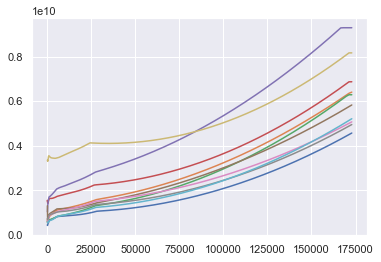

In [6]:
plt.plot(lassocv.alphas_,lassocv.mse_path_)

In [7]:
##### 選最佳的alpha 訓練 model #####
##### 基於最佳lambda值建模 #####

lasso_model = Lasso(alpha = lasso_best_alpha,max_iter = 50000,tol = 0.0001, normalize=False)
lasso_model.fit(train_dt, SalePrice)

Lasso(alpha=138.8860344214894, max_iter=50000)

In [8]:
##### prediction #####
y_pred=lasso_model.predict(test_dt)
y_pred=y_pred.flatten()

y_true = np.array(test_ans)

In [9]:
print('RMSE：',np.sqrt(MSE(y_true,y_pred)))  #Rmse
#print('r2_score : ',r2_score(y_true,y_pred)) 
print('RMLE:',MSLE(y_true, y_pred)) #Kaggle評分標準

RMSE： 72336.0481294007
RMLE: 0.18751618074211437
